In [7]:
from os import path
import numpy as np

import astropy.coordinates as coord
import astropy.units as u
from astropy.io import fits
from astropy.table import Table
import matplotlib.pyplot as plt
plt.style.use('notebook.mplstyle')
%matplotlib inline
import numpy as np

In [2]:
data_path = '../data/'

# Reading the Gaia TGAS data


In [3]:
tgas = Table.read(path.join(data_path, 'gaia', 'tgas_2mass_wise.fits'))
# tgas = Table(fits.getdata(path.join(data_path, 'gaia', 'tgas_2mass_wise.fits')))

In [4]:
print(tgas.colnames)

['hip', 'tycho2_id', 'solution_id', 'source_id', 'random_index', 'ref_epoch', 'ra', 'ra_error', 'dec', 'dec_error', 'parallax', 'parallax_error', 'pmra', 'pmra_error', 'pmdec', 'pmdec_error', 'ra_dec_corr', 'ra_parallax_corr', 'ra_pmra_corr', 'ra_pmdec_corr', 'dec_parallax_corr', 'dec_pmra_corr', 'dec_pmdec_corr', 'parallax_pmra_corr', 'parallax_pmdec_corr', 'pmra_pmdec_corr', 'astrometric_n_obs_al', 'astrometric_n_obs_ac', 'astrometric_n_good_obs_al', 'astrometric_n_good_obs_ac', 'astrometric_n_bad_obs_al', 'astrometric_n_bad_obs_ac', 'astrometric_delta_q', 'astrometric_excess_noise', 'astrometric_excess_noise_sig', 'astrometric_primary_flag', 'astrometric_relegation_factor', 'astrometric_weight_al', 'astrometric_weight_ac', 'astrometric_priors_used', 'matched_observations', 'duplicated_source', 'scan_direction_strength_k1', 'scan_direction_strength_k2', 'scan_direction_strength_k3', 'scan_direction_strength_k4', 'scan_direction_mean_k1', 'scan_direction_mean_k2', 'scan_direction_mean

Make two color-magnitude diagrams for all stars within 150 pc:

In [21]:
with u.set_enabled_equivalencies(u.parallax()):
    dist = coord.Distance((tgas['parallax'] * u.mas).to(u.pc), 
                          allow_negative=True)
    
dist_cut = (dist < 150. * u.pc) & (dist > 0)

In [45]:
M_G = tgas['phot_g_mean_mag'][dist_cut] - dist[dist_cut].distmod.value
G_J = tgas['phot_g_mean_mag'][dist_cut] - tgas[dist_cut]['j_m']
G_W1 = tgas['phot_g_mean_mag'][dist_cut] - tgas[dist_cut]['w1mpro']

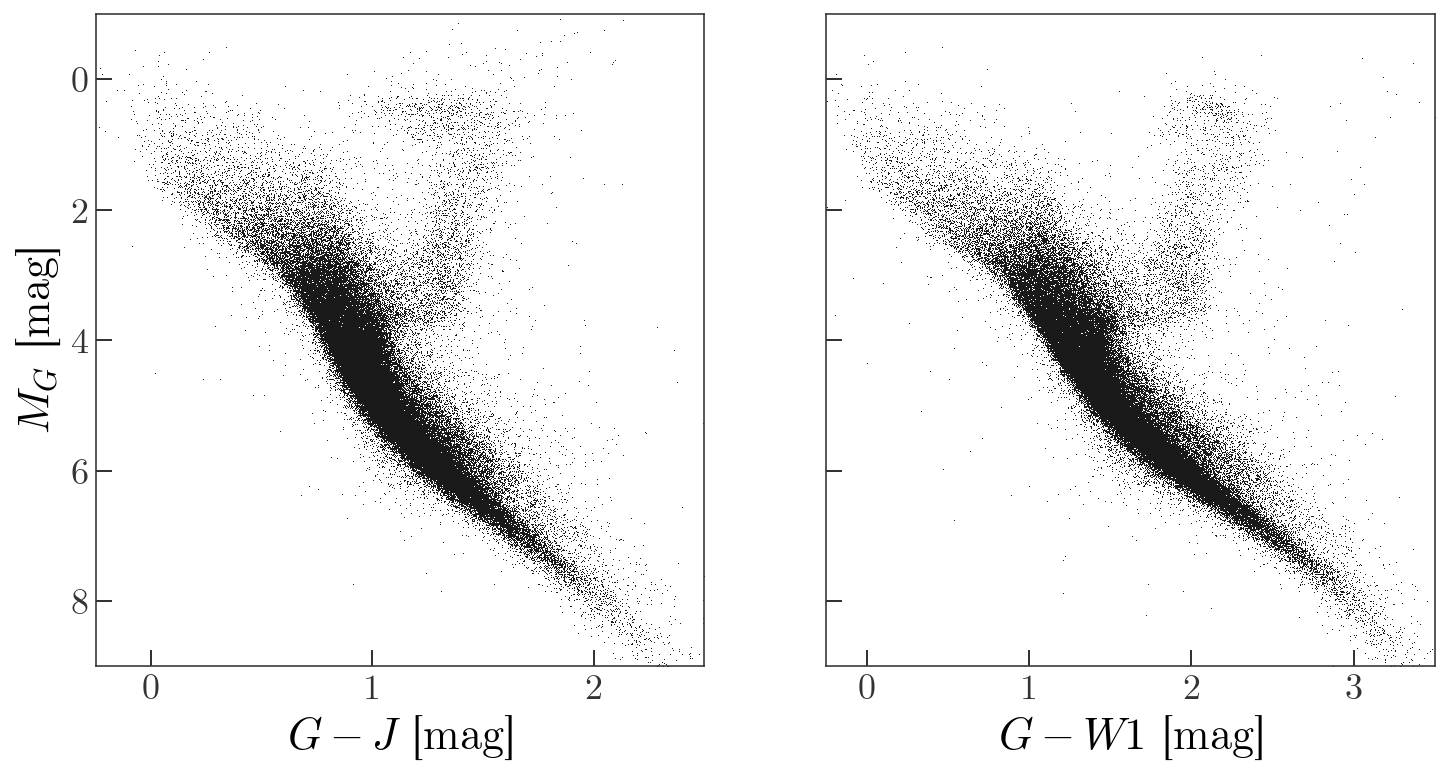

In [48]:
fig,axes = plt.subplots(1, 2, figsize=(12, 6), sharey=True)
axes[0].plot(G_J, M_G, marker=',', linestyle='none')
axes[1].plot(G_W1, M_G, marker=',', linestyle='none')

axes[0].set_xlim(-0.25, 2.5)
axes[0].set_ylim(9, -1)

axes[1].set_xlim(-0.25, 3.5)

axes[0].set_xlabel('$G-J$ [mag]')
axes[1].set_xlabel('$G-W1$ [mag]')
axes[0].set_ylabel('$M_G$ [mag]')